In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import missingno as msno

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.base import clone
from sklearn.metrics import f1_score

In [2]:
def display_confusion_matrix(y_valid, y_pred):
    '''
    Display the confusion matrix as heatmap
    '''
    cf_matrix = confusion_matrix(y_valid, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
    disp.plot()
    plt.show()

In [3]:
RANDOM_STATE = 42

In [4]:
column_names = ["Sample code number",            
                "Clump Thickness",              
                "Uniformity of Cell Size",       
                "Uniformity of Cell Shape",
                "Marginal Adhesion",
                "Single Epithelial Cell Size",
                "Bare Nuclei",
                "Bland Chromatin",
                "Normal Nucleoli",
                "Mitoses",
                "Class"
                ]

column_names = [col.lower() for col in column_names]
column_names = [col.replace(" ", "_") for col in column_names]

df = pd.read_csv("data/breast-cancer-wisconsin.csv", header=None, names=column_names, na_values='?')

In [5]:
df.head()

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sample_code_number           699 non-null    int64  
 1   clump_thickness              699 non-null    int64  
 2   uniformity_of_cell_size      699 non-null    int64  
 3   uniformity_of_cell_shape     699 non-null    int64  
 4   marginal_adhesion            699 non-null    int64  
 5   single_epithelial_cell_size  699 non-null    int64  
 6   bare_nuclei                  683 non-null    float64
 7   bland_chromatin              699 non-null    int64  
 8   normal_nucleoli              699 non-null    int64  
 9   mitoses                      699 non-null    int64  
 10  class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [7]:
df.describe()

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## EDA

Text(0.5, 1.0, 'Distribution of class')

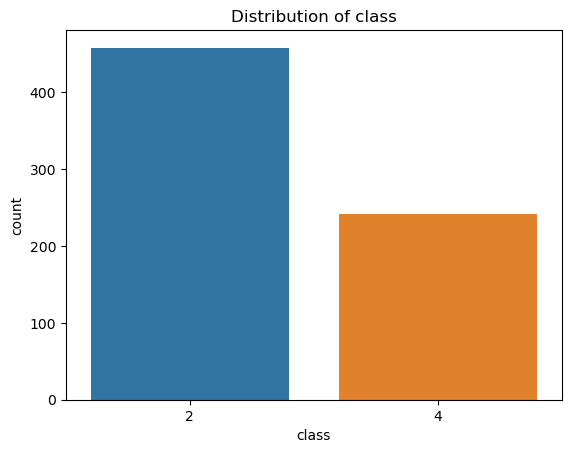

In [8]:
# Distribution of the target feature

sns.countplot(x="class", data=df)
plt.title("Distribution of class")

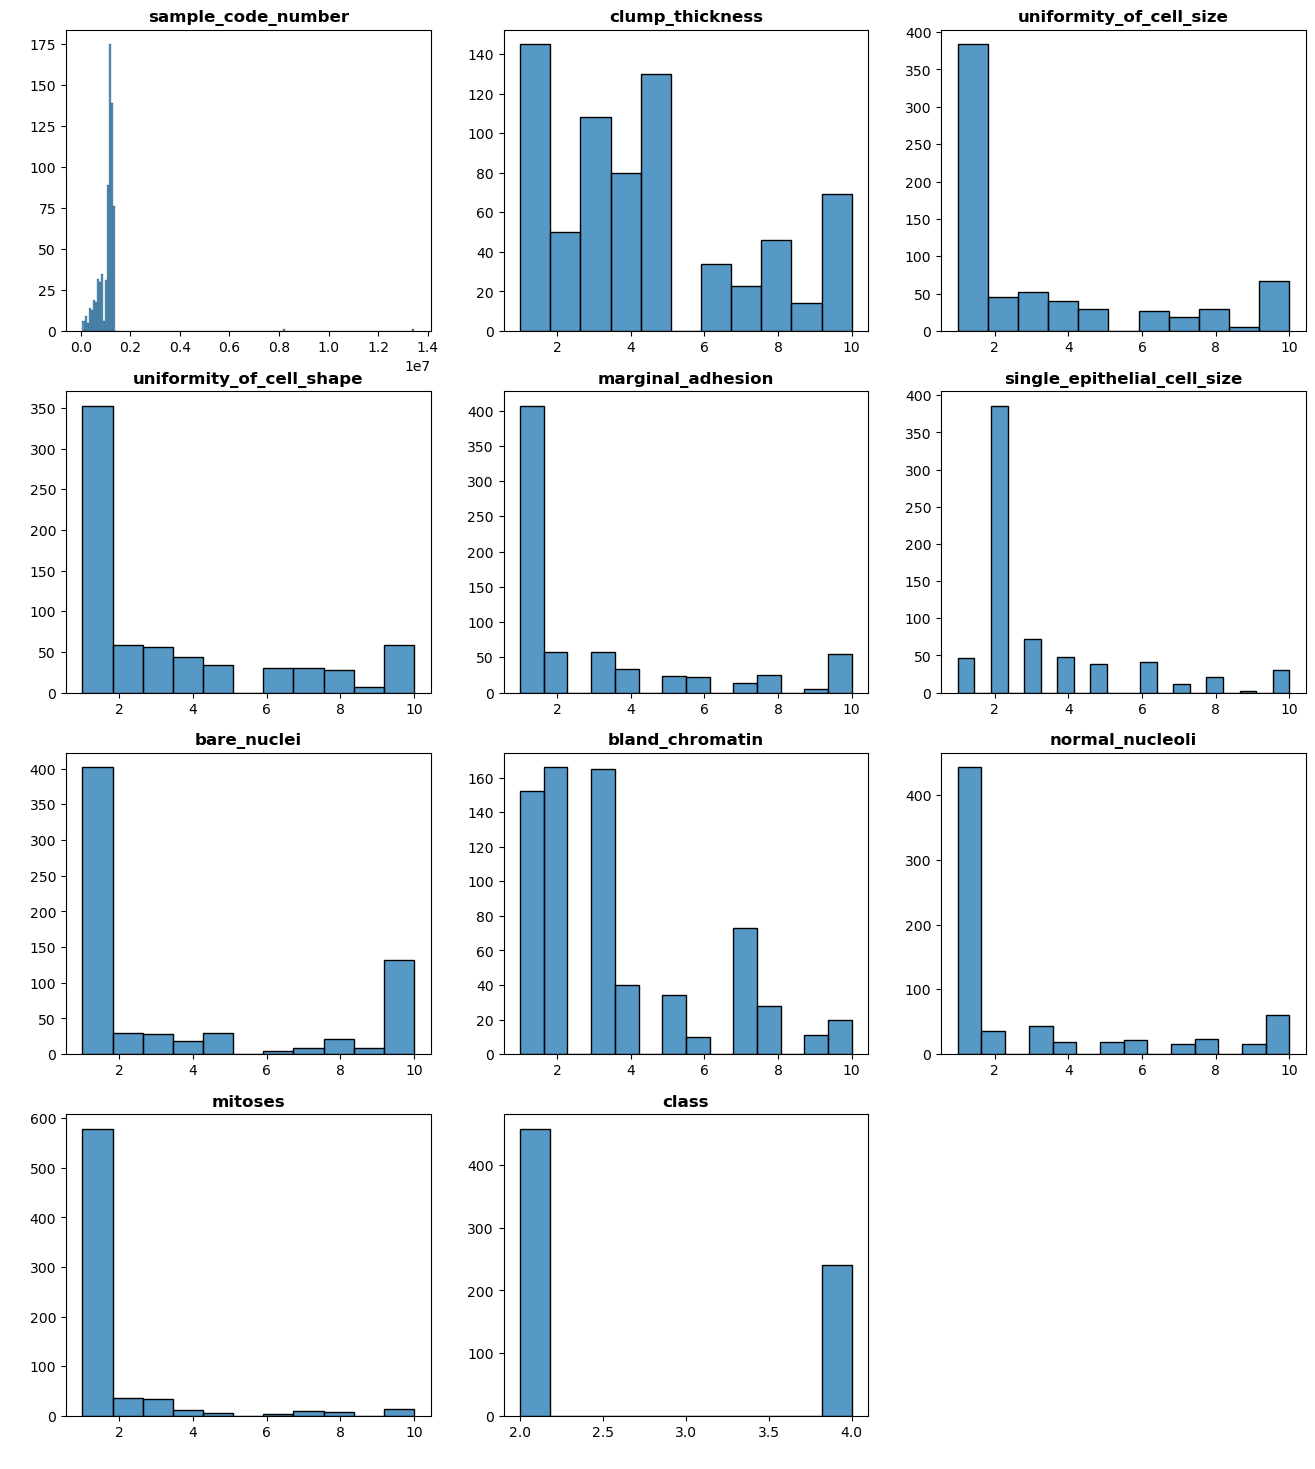

In [9]:
plt.figure(figsize= (16,18))
for i,col in enumerate(df.columns):
    plt.subplot(4,3, i+1)
    sns.histplot(df[col])
    plt.title(col, weight = 'bold')
    plt.ylabel(" ")
    plt.xlabel(" ")

<AxesSubplot:>

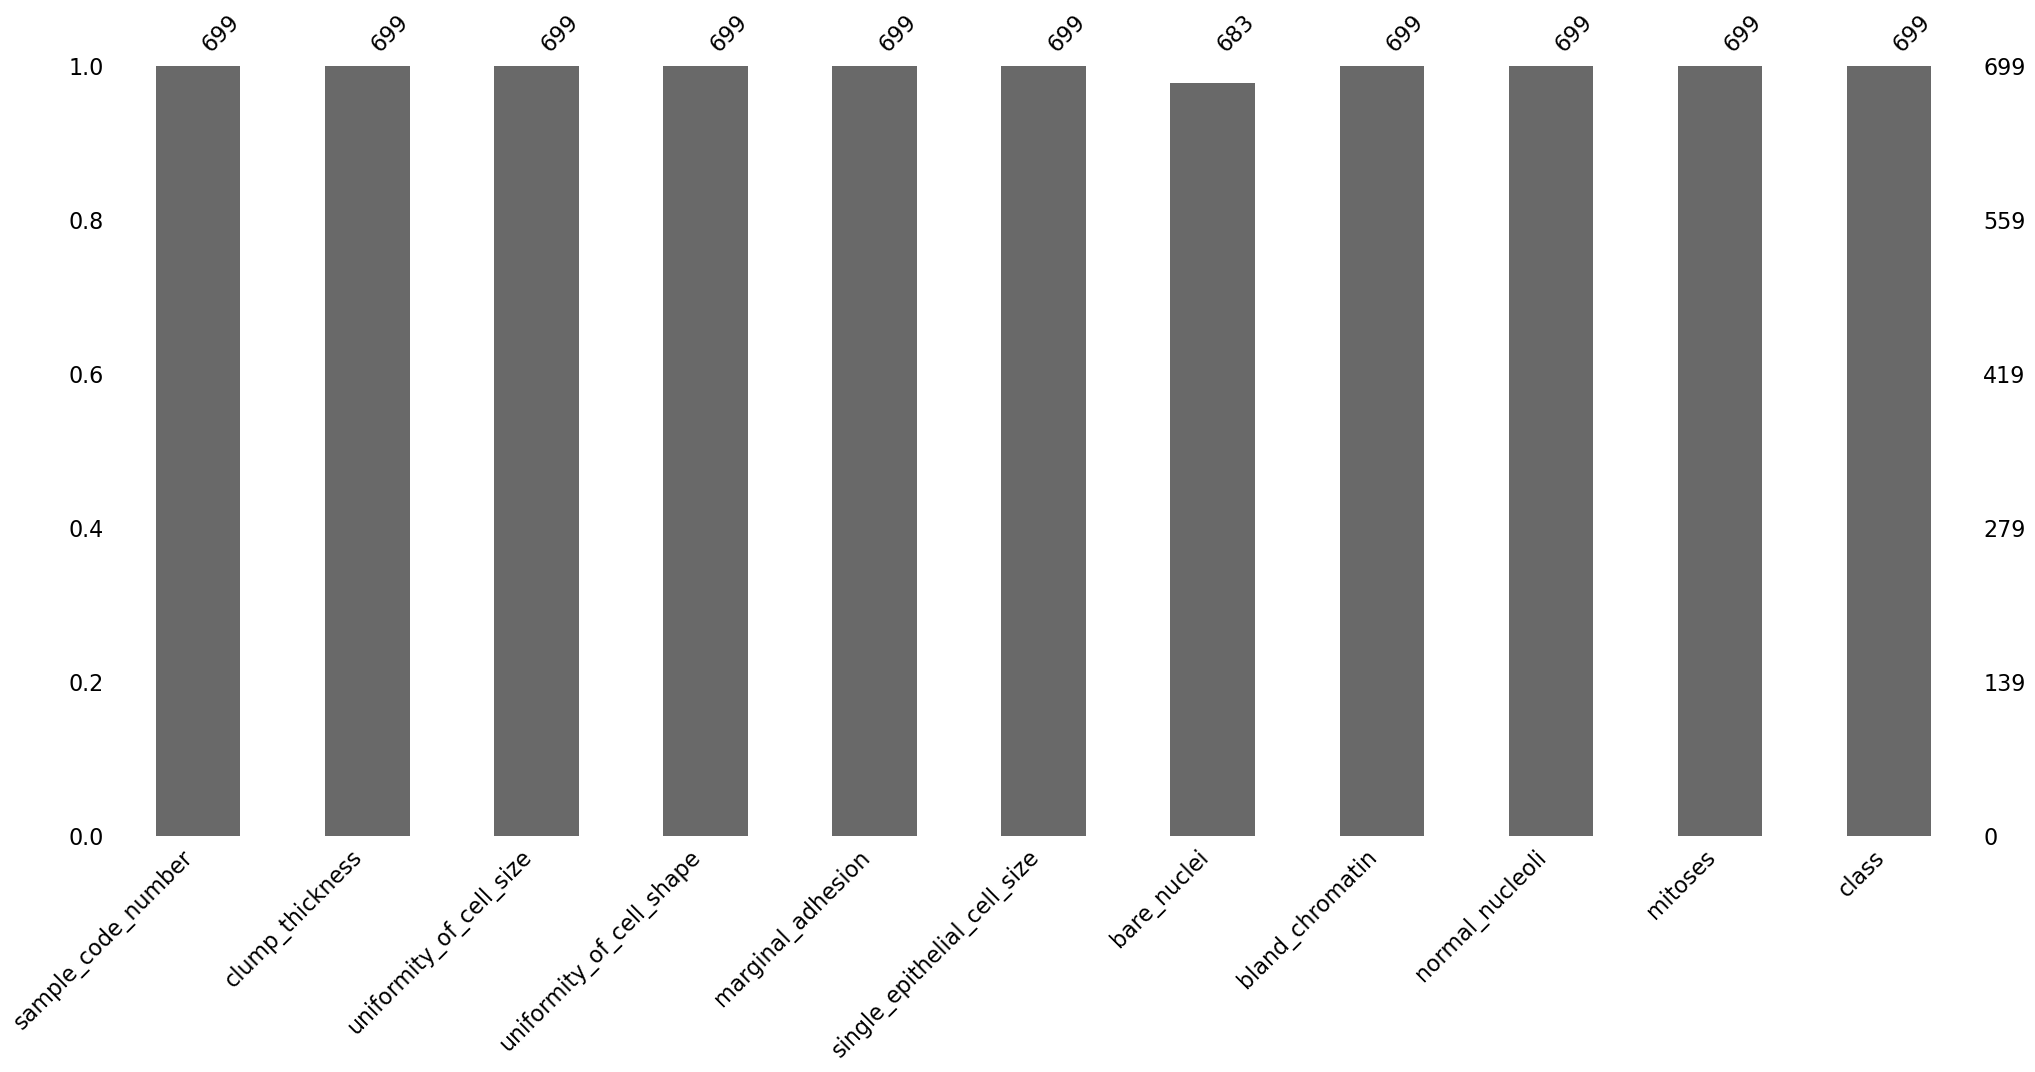

In [10]:
msno.bar(df)

## Summary

* Drop the id column (sample_code_number)
* The column bare_nuclei has missing values
* All of the features are in the same scale (1 to 10)
* Target feature (class) has values 2 and 4
* The dataset is unbalanced: it has more examples of class 2

## Data preprocessing

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sample_code_number           699 non-null    int64  
 1   clump_thickness              699 non-null    int64  
 2   uniformity_of_cell_size      699 non-null    int64  
 3   uniformity_of_cell_shape     699 non-null    int64  
 4   marginal_adhesion            699 non-null    int64  
 5   single_epithelial_cell_size  699 non-null    int64  
 6   bare_nuclei                  683 non-null    float64
 7   bland_chromatin              699 non-null    int64  
 8   normal_nucleoli              699 non-null    int64  
 9   mitoses                      699 non-null    int64  
 10  class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [12]:
df["bare_nuclei"] = df["bare_nuclei"].astype("object")

In [13]:
df.drop("sample_code_number", axis=1, inplace=True)

In [18]:
imp = SimpleImputer(strategy='most_frequent')
df["bare_nuclei"] = imp.fit_transform(df["bare_nuclei"].to_numpy().reshape(-1,1))

In [19]:
y = df["class"]
X = df.drop("class", axis=1)

In [21]:
le = LabelEncoder()

In [22]:
y = le.fit_transform(y)

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=RANDOM_STATE)

## Train model

In [102]:
#params = {
#    'random_state': RANDOM_STATE,
#    'n_estimators': 80,
#    'min_samples_leaf': 15,
#    'oob_score': True,
#}

params["oob_score"] = True

In [103]:
rf = RandomForestClassifier(**params)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=1000, oob_score=True)

In [104]:
y_pred = rf.predict(X_val)
y_pred_train = rf.predict(X_train)

In [105]:
print(f"RF train accuracy: {rf.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {rf.score(X_val, y_val):.3f}")

RF train accuracy: 0.986
RF test accuracy: 0.971


In [106]:
print(f1_score(y_train, y_pred_train))

0.9798994974874372


In [107]:
print(f1_score(y_val, y_pred))

0.9555555555555556


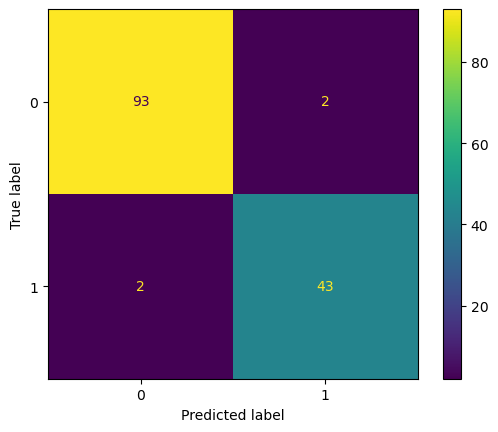

In [108]:
display_confusion_matrix(y_val, y_pred)

## RF feature importance

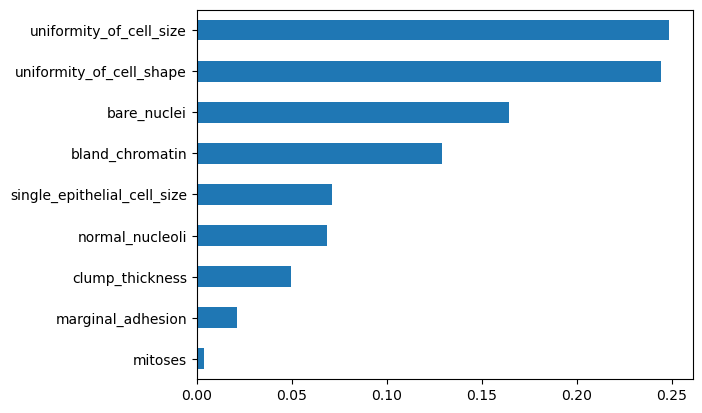

In [109]:
feat_importances = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh');

## Permutation importance

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   1.4s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   1.4s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.4s
[CV] END bootstrap=True, max_depth=2

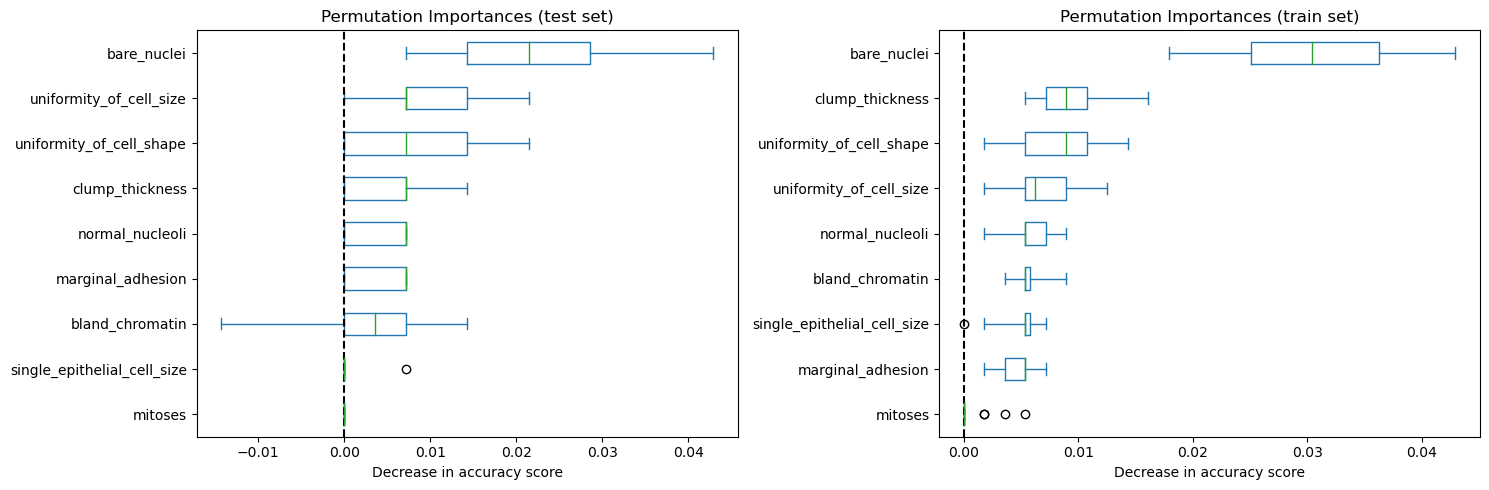

In [110]:
result_test = permutation_importance(
    rf, X_val, y_val, n_repeats=20, random_state=42, n_jobs=2
)

sorted_importances_idx_test = result_test.importances_mean.argsort()
importances_test = pd.DataFrame(
    result_test.importances[sorted_importances_idx_test].T,
    columns=X.columns[sorted_importances_idx_test],
)

#calculate permutation importance for training data 
result_train = permutation_importance(
    rf, X_train, y_train, n_repeats=20, random_state=42, n_jobs=2
)

sorted_importances_idx_train = result_train.importances_mean.argsort()
importances_train = pd.DataFrame(
    result_train.importances[sorted_importances_idx_train].T,
    columns=X.columns[sorted_importances_idx_train],
)

f, axs = plt.subplots(1,2,figsize=(15,5))

importances_test.plot.box(vert=False, whis=10, ax = axs[0])
axs[0].set_title("Permutation Importances (test set)")
axs[0].axvline(x=0, color="k", linestyle="--")
axs[0].set_xlabel("Decrease in accuracy score")
axs[0].figure.tight_layout()

importances_train.plot.box(vert=False, whis=10, ax = axs[1])
axs[1].set_title("Permutation Importances (train set)")
axs[1].axvline(x=0, color="k", linestyle="--")
axs[1].set_xlabel("Decrease in accuracy score")
axs[1].figure.tight_layout()

# Drop column importances

<AxesSubplot:ylabel='Feature'>

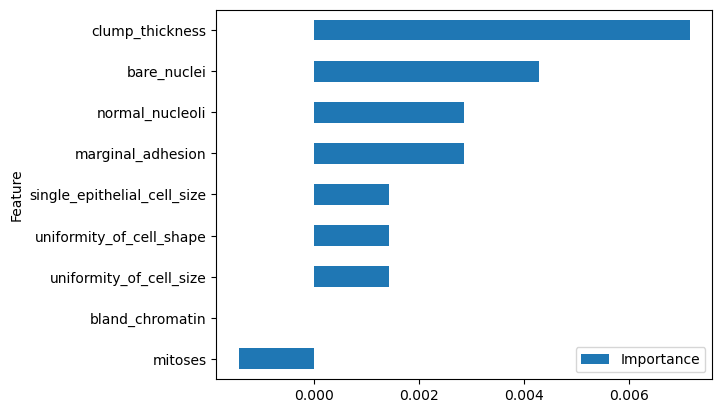

In [117]:
def dropcol_importances(rf, X_train, y_train):
    rf_ = clone(rf)
    rf_.random_state = 42
    rf_.fit(X_train, y_train)
    
    #use out of bag error as performance measurement
    baseline = rf_.oob_score_
    imp = []
    for col in X_train.columns:
        X = X_train.drop(col, axis=1)
        rf_ = clone(rf)
        rf_.random_state = 42
        rf_.fit(X, y_train)
        o = rf_.oob_score_
        imp.append(baseline - o)
    imp = np.array(imp)
    I = pd.DataFrame(
            data={'Feature':X_train.columns,
                  'Importance':imp})
    I = I.set_index('Feature')
    I = I.sort_values('Importance', ascending=True)
    return I


imp = dropcol_importances(RandomForestClassifier(**params), X, y)
imp.plot(kind = 'barh')

## Hyperparameter tunning

In [92]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [94]:
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator=rf, 
                               param_distributions=random_grid, 
                               n_iter=100, cv=3, 
                               verbose=2, random_state=42, 
                               n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [116]:
params = rf_random.best_params_
params["oob_score"] = True